<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/04_01_AE_fashion_mnist_7_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 4-1 : Auto Encoder/Denoise AE** 


## **Import Module**

In [0]:
%tensorflow_version 2.x

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models, utils

tf.__version__

TensorFlow 2.x selected.


'2.0.0'

## **DataSet**

### Load

In [0]:
# options
# select dataset : fashion_mnist or mnist
#fashion_mnist_on = False  # True/False
fashion_mnist_on = True  

# select noise on/off : on 시 denoising  
noise_on = True  # True/False
#noise_on = False

In [0]:
if fashion_mnist_on :
  (x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
  print("Fashion_mnist loaded")
else :
  (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
  print("MNIST loaded")


4423680/4422102 [==============================] - 0s 0us/step
Fashion_mnist loaded


In [0]:
x_train.shape[0], len(x_train)

(60000, 60000)

### Preprocessing

Noisy Data Selected
(60000, 784)
(10000, 784)


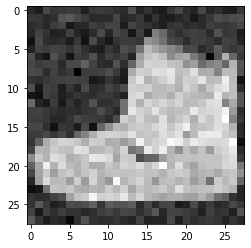

In [0]:
# Normalize
x_train, x_test = x_train/255., x_test/255.

# Dense layer 입력에 맞추어 shape 변환
# (60000,784) <- (60000,28,28)
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

if noise_on : 
  x_train = x_train + 0.1*np.random.randn(x_train.shape[0], 784)
  x_test = x_test + 0.1*np.random.randn(x_test.shape[0], 784)
  print("Noisy Data Selected")

# Print out the shape
print(x_train.shape)
print(x_test.shape)

plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()



```
# This is formatted as code
```

- np.random.rand(5)  
array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])  
- randn : 평균이 0이고 표준편차가 1인 표준 정규 분포  
np.random.randn(5)  
array([-0.30237513, -2.2244036 ,  0.72400636,  0.35900276,  1.07612104])  
- np.random.randint(10, 20, size=10)  
array([10, 19, 16, 15, 13, 11, 18, 10, 14, 19])  


## **Model**

### Define

In [0]:
from tensorflow.keras import regularizers 

# Size of encoded representation
# 784 -> 32 : compression factor 24.5 
encoding_dim = 10 #32

### Functional API ###
# Input placeholder
i_input = layers.Input(shape=(784,))

# Encoded representation of input image
encode_1 = layers.Dense(encoding_dim, activation='sigmoid')(i_input)
encode_2 = layers.Dense(encoding_dim, activation='sigmoid',
              activity_regularizer = regularizers.l2(0.005))(i_input) # 두 모델(1, 2)의 차이점!! : activity_regularizer = regularizers.l2(0.005)
                                                                      # Overfitting을 최대한 방지하면서 Generalized됨!!
                                                                      # L2를 regulaization하면, 어떤 소수의 weight들만 커지는 것을 최대한 방지.
                                                                      # 최대한 다른 weights들도 0의 값을 가지지 않도록 분산됨!
# Decode is lossy reconstruction of input              
decoded_1 =  layers.Dense(784, activation='sigmoid')(encode_1)
decoded_2 =  layers.Dense(784, activation='sigmoid')(encode_2)

In [0]:
# This autoencoder will map input to reconstructed output
autoencoder1 =  models.Model(inputs=i_input, outputs=decoded_1, name='ae-1')
autoencoder2 =  models.Model(inputs=i_input, outputs=decoded_2, name='ae-2')

In [0]:
# Select optimizer and loss function
autoencoder1.compile(optimizer='rmsprop', loss='mse') 
autoencoder2.compile(optimizer='rmsprop', loss='mse')

autoencoder1.summary()
print("\n\n\n")
autoencoder2.summary()

Model: "ae-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               8624      
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________




Model: "ae-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
________________________________________

### Fit

Epoch 100/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0640 - val_loss: 0.0636
CPU times: user 1min 27s, sys: 9.37 s, total: 1min 37s

Wall time: 1min 12s (@Notebook Setting/GPU)

In [0]:
%%time
epoch_n = 100 # 60
batch_size_n = 128 # 512
### Model-1 ###
autoencoder1.fit(x_train, x_train,
                epochs=epoch_n,
                batch_size=batch_size_n,
                validation_freq=10,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1063
Epoch 2/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0970
Epoch 3/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0970
Epoch 4/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0970
Epoch 5/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0970
Epoch 6/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0970
Epoch 7/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0970
Epoch 8/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0970
Epoch 9/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0970
Epoch 10/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0970 - val_loss: 0.0967
Epoch 11/100
60000/60000 [==============

Epoch 100/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0172 - val_loss: 0.0170
CPU times: user 1min 14s, sys: 8.23 s, total: 1min 22s

Wall time: 1min 15s

In [0]:
%%time
autoencoder2.fit(x_train, x_train,
                epochs=epoch_n,
                batch_size=batch_size_n,
                validation_freq=10,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1155
Epoch 2/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0716
Epoch 3/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0593
Epoch 4/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0527
Epoch 5/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0487
Epoch 6/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0462
Epoch 7/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0445
Epoch 8/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0432
Epoch 9/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0422
Epoch 10/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0414 - val_loss: 0.0409
Epoch 11/100
60000/60000 [==============

## **Analysis**

### Predict

In [0]:
decoded_imgs1 = autoencoder1.predict(x_test)
decoded_imgs2 = autoencoder2.predict(x_test)

### Plot

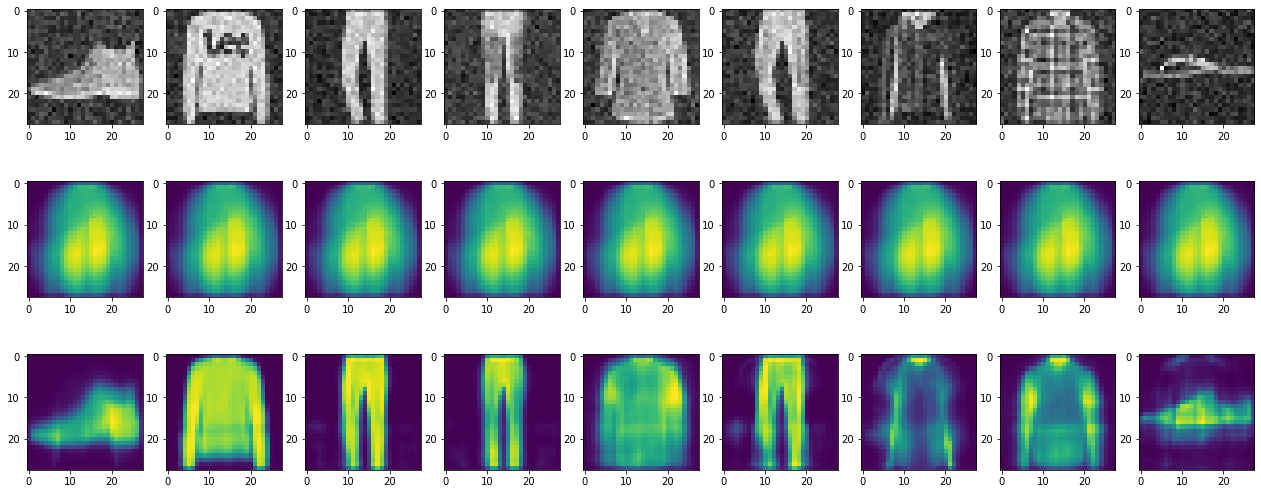

In [0]:
# use Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 9))

num_imgs = 9

for i in range(num_imgs):                        
    # display original
    ax = plt.subplot(3, num_imgs, i + 1)
    true_img = x_test[i].reshape(28, 28)
    plt.imshow(true_img, cmap='gray')

    # display reconstruction 1
    ax = plt.subplot(3, num_imgs, i + 1 + num_imgs)
    reconstructed_img = decoded_imgs1[i].reshape(28,28)
    plt.imshow(reconstructed_img)#, cmap='gray')

    # display reconstruction 2
    ax = plt.subplot(3, num_imgs, i + 1 + num_imgs*2)
    reconstructed_img = decoded_imgs2[i].reshape(28,28)
    plt.imshow(reconstructed_img)#, cmap="gray")

plt.show()

## **실습 과제**

### 과제 1. 두 모델의 차이를 확인해 보자 
#### -- Regularization은 모델이 커서 overfiting이 발생하는 것을 막기위해서 사용한다. 이 모델은 매우 작은 모델인데, Regularizor가 성능을 좋게 하는 이유가 무었일까 생각해 보자
#### -- 생각을 적어 보자: 




### 과제 2. Data set에 noise 가 추가 되는 경우 어떻게 동작하는지 확인해 보자
#### -- dataset을 읽어 오는 cell 에서 "noise_on = False" 를 "True"로 변경하자
#### -- Noisy data로 다시 학습해 보자. Noise가 잘 제거 되었는가? 
#### -- DataSet을 변경하여 결과를 확인해 보자


### 과제 3. DataSet을 MNIST로 하고, `noise_on =`를 False로, `encoding_dim =`을 10으로 설정하여 학습하고, 학습된 가중치(weight)들을 image로 확인해 보자
#### -- 아래 코드를 실행하고, 결과를 분석해 보자 
#### -- 마지막 그림은 무엇을 보여주는지 적어보자: 



## 과제3 code  


img.shape : (784, 10)


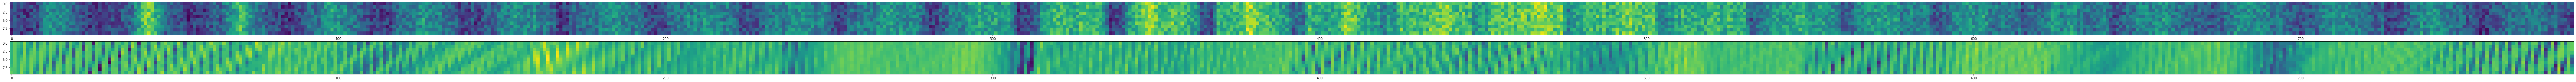

In [0]:
dim=10  # 일단 위에서 encoding_dim를 기존 32에서 10으로 수정한 후, 실행!!!


# 이 부분은 784개로 입력되었던 데이터들이 10개로 mapping되는 과정에서의 weight! (encoding)


f1=autoencoder1.get_weights()   # autoencoder1은 regularization l2를 사용하지 않는 것
plt.figure(figsize=(200, 4))
plt.subplot(2,1,1)
# Encoder_1 Dense Layer의 W(784x10=7840) 읽음
img = f1[0]
print("img.shape :", img.shape)

dimg = img.reshape(784,dim) # (784,10)<- (7840)
plt.imshow(dimg) 
dimgT = np.transpose(dimg)
plt.imshow(dimgT)               # -> autoencoder1의 weights를 보고 싶네? (밝을수록 weight 값이 큰 것!) : 특징들이 비교적 잘 보이지 않음




plt.subplot(2,1,2)
f2=autoencoder2.get_weights()   # autoencoder2은 regularization l2를 사용하지 않는 것
# Encoder_2 Dense Layer의 W(784x10=7840) 읽음
img2 = f2[2]
dimg2 = img2.reshape(784,dim) # (784,10)<- (7840)
dimg2T = np.transpose(dimg2)
plt.imshow(dimg2T)              # -> autoencoder2의 weights를 보고 싶네? (밝을수록 weight 값이 큰 것!) : 특징들이 비교적 잘 보임

plt.show()

#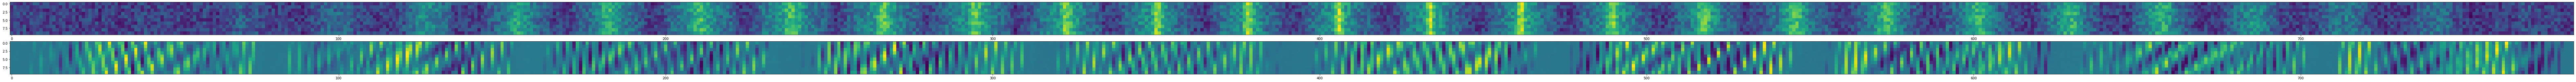

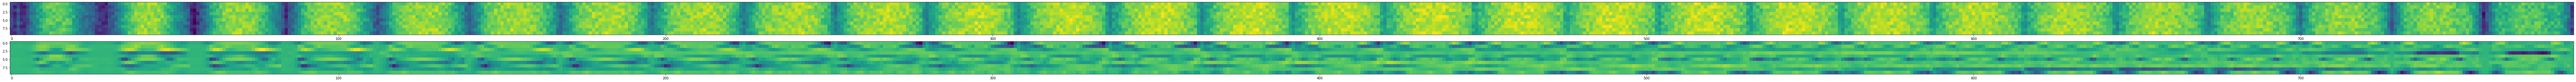

In [0]:
# 이 부분은 10개로 mapping됐던 데이터들을 784로 dense해주는 과정에서의 weight! (decoding)
# => class들의 영향력?? 각 class별로 어떤 글자/색깔 등...을 만드는데 영향을 미치는지 볼 수 있다고 함!;;

f1=autoencoder1.get_weights()
plt.figure(figsize=(200,4))
plt.subplot(2,1,1)
# Decoder_1 Dense Layer의 W(10x784=7840) 읽음
img = f1[2]
dimg = img.reshape(dim,784) #(10,784)<-(7840)
plt.imshow(dimg)

plt.subplot(2,1,2)
f2=autoencoder2.get_weights()
img = f2[2]
# Decoder_2 Dense Layer의 W(10x784=7840) 읽음
dimg = img.reshape(dim,784)
plt.imshow(dimg)

plt.show()

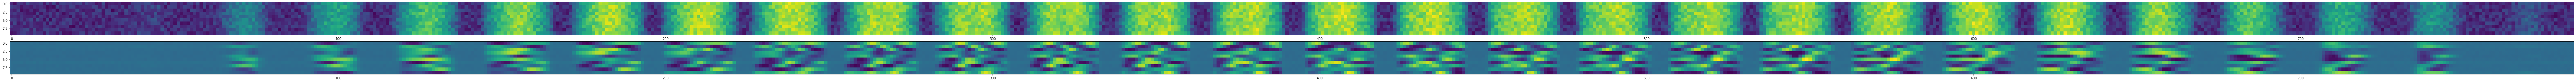

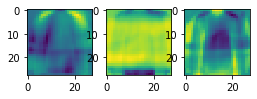

In [0]:
i=2
plt.figure(figsize=(4,8))
plt.subplot(1,3,1)
f2=autoencoder2.get_weights()
img = f2[2]
dimg = img.reshape(dim,784)

dim_1 = dimg[i:i+1,:].reshape(28,28)
plt.imshow(dim_1)

plt.subplot(1,3,2)
plt.imshow(dim_1)
dim_2 = dimg[i+1:i+2,:].reshape(28,28)
plt.imshow(dim_2)

plt.subplot(1,3,3)
plt.imshow(dim_1)
dim_3 = dimg[i+2:i+3,:].reshape(28,28)
plt.imshow(dim_3)

plt.show()

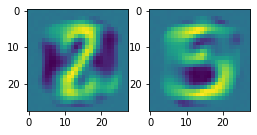